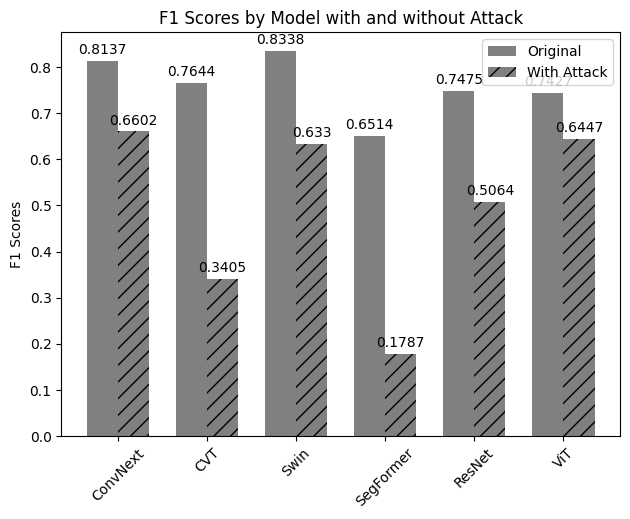

In [1]:
import matplotlib.pyplot as plt
import numpy as np


f1_scores = {
  "ConvNext": {
    "Original": 0.8137,
    "Gaussian Noise L1": 0.7368,
    "Gaussian Noise L2": 0.7160,
    "Gaussian Noise L3": 0.6583,
    "Defocus Blur L1": 0.6877,
    "Defocus Blur L2": 0.6335,
    "Defocus Blur L3": 0.4997,
    "Pixelate L1": 0.7200,
    "Pixelate L2": 0.6722,
    "Pixelate L3": 0.6173
  },
  "CVT": {
    "Original": 0.7644,
    "Gaussian Noise L1": 0.4771,
    "Gaussian Noise L2": 0.3370,
    "Gaussian Noise L3": 0.1829,
    "Defocus Blur L1": 0.3860,
    "Defocus Blur L2": 0.2773,
    "Defocus Blur L3": 0.1375,
    "Pixelate L1": 0.5172,
    "Pixelate L2": 0.4598,
    "Pixelate L3": 0.2897
  },
  "Swin": {
    "Original": 0.8338,
    "Gaussian Noise L1": 0.7011,
    "Gaussian Noise L2": 0.6395,
    "Gaussian Noise L3": 0.5506,
    "Defocus Blur L1": 0.6601,
    "Defocus Blur L2": 0.5743,
    "Defocus Blur L3": 0.4156,
    "Pixelate L1": 0.7541,
    "Pixelate L2": 0.7295,
    "Pixelate L3": 0.6725
  },
  "SegFormer": {
    "Original": 0.6514,
    "Gaussian Noise L1": 0.3623,
    "Gaussian Noise L2": 0.2556,
    "Gaussian Noise L3": 0.1240,
    "Defocus Blur L1": 0.1628,
    "Defocus Blur L2": 0.0839,
    "Defocus Blur L3": 0.0264,
    "Pixelate L1": 0.2885,
    "Pixelate L2": 0.2039,
    "Pixelate L3": 0.1013
  },
  "ResNet": {
    "Original": 0.7475,
    "Gaussian Noise L1": 0.5868,
    "Gaussian Noise L2": 0.4786,
    "Gaussian Noise L3": 0.3084,
    "Defocus Blur L1": 0.5845,
    "Defocus Blur L2": 0.5071,
    "Defocus Blur L3": 0.3668,
    "Pixelate L1": 0.6320,
    "Pixelate L2": 0.6320,
    "Pixelate L3": 0.4610
  },
  "ViT": {
    "Original": 0.7427,
    "Gaussian Noise L1": 0.7065,
    "Gaussian Noise L2": 0.6410,
    "Gaussian Noise L3": 0.4980,
    "Defocus Blur L1": 0.6594,
    "Defocus Blur L2": 0.6128,
    "Defocus Blur L3": 0.5075,
    "Pixelate L1": 0.7405,
    "Pixelate L2": 0.7383,
    "Pixelate L3": 0.6987
  }
}

import matplotlib.pyplot as plt
import numpy as np

# 计算每个模型受到攻击时的平均F1分数
attack_averages = {}
for model, scores in f1_scores.items():
    attack_scores = [score for key, score in scores.items() if key != 'Original']
    attack_averages[model] = np.mean(attack_scores)

# 创建柱状图
labels = list(f1_scores.keys())
original_scores = [f1_scores[model]['Original'] for model in labels]
attack_scores = [attack_averages[model] for model in labels]

x = np.arange(len(labels))  # X轴标签的位置
width = 0.35  # 柱子的宽度

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_scores, width, label='Original', color='grey')
rects2 = ax.bar(x + width/2, attack_scores, width, label='With Attack', color='grey', hatch='//')

# 添加标签、标题和自定义X轴标签
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores by Model with and without Attack')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 添加文字标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()



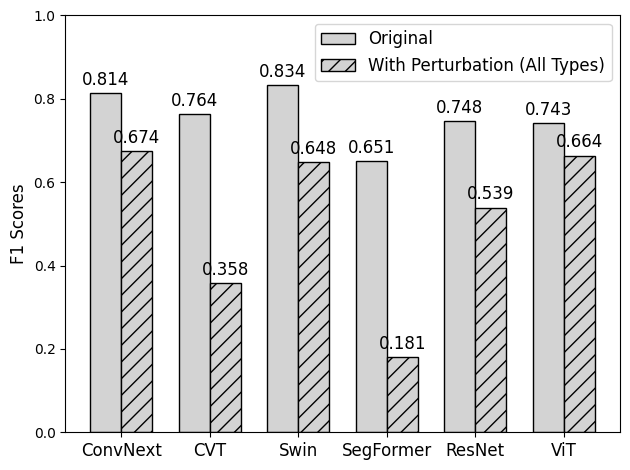

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 计算每个模型在L2级别的噪声下的平均F1分数
attack_averages = {}
for model, scores in f1_scores.items():
    attack_scores = [
        scores["Gaussian Noise L2"],
        scores["Defocus Blur L2"],
        scores["Pixelate L2"]
    ]
    attack_averages[model] = np.mean(attack_scores)

# 创建柱状图
labels = list(f1_scores.keys())
original_scores = [f1_scores[model]['Original'] for model in labels]
attack_scores = [attack_averages[model] for model in labels]

x = np.arange(len(labels))  # X轴标签的位置
width = 0.35  # 柱子的宽度

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_scores, width, label='Original', color='lightgrey', edgecolor='black')
rects2 = ax.bar(x + width/2, attack_scores, width, label='With Perturbation (All Types)', color='lightgrey', hatch='//', edgecolor='black')

# 设置Y轴范围
ax.set_ylim(0, 1)

# 添加标签和自定义X轴标签
ax.set_ylabel('F1 Scores', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# 添加文字标签
# 添加文字标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),  # Round to 3 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()
plt.show()


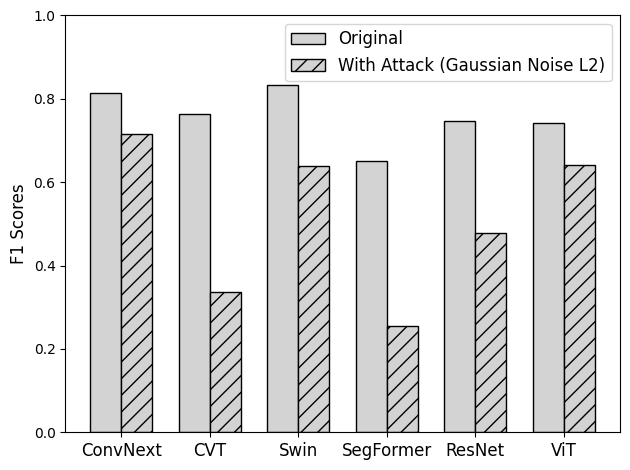

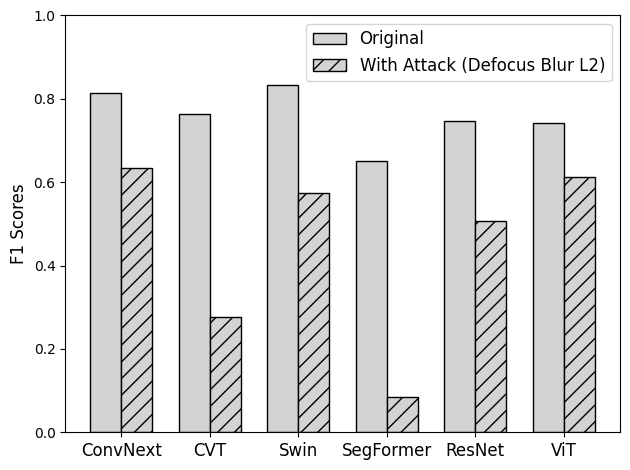

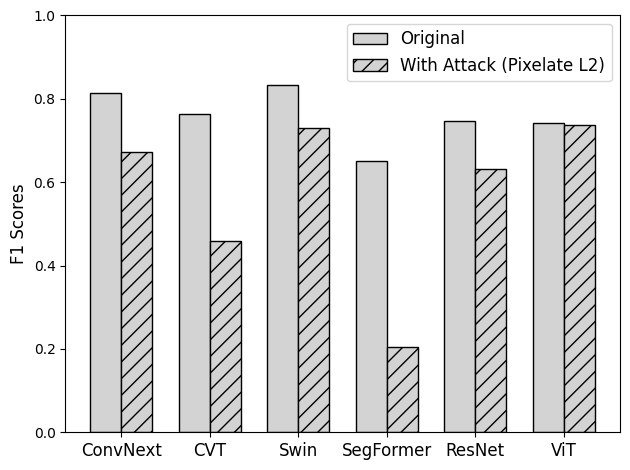

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
labels = list(f1_scores.keys())
original_scores = [f1_scores[model]['Original'] for model in labels]

# 创建柱状图的函数
def create_bar_chart(attack_type):
    attack_scores = [f1_scores[model][f'{attack_type} L2'] for model in labels]

    x = np.arange(len(labels))  # X轴标签的位置
    width = 0.35  # 柱子的宽度

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, original_scores, width, label='Original', color='lightgrey', edgecolor='black')
    rects2 = ax.bar(x + width/2, attack_scores, width, label=f'With Attack ({attack_type} L2)', color='lightgrey', hatch='//', edgecolor='black')

    # 设置Y轴范围和标签
    ax.set_ylim(0, 1)
    ax.set_ylabel('F1 Scores', fontsize=12)

    # 设置X轴标签
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.legend(fontsize=12)

    # 添加文字标签
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

# 定义添加文字标签的函数
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

# 分别为三种攻击生成图表
for attack in ['Gaussian Noise', 'Defocus Blur', 'Pixelate']:
    create_bar_chart(attack)
